In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df =pd.read_csv('ventas_detalladas_2025_v2.csv')
df.head()

,Num_Boleta,Fecha,SKU,Descripcion,Categoria,Unidad_medida,Precio_unidad,Cantidad_item,Subtotal_item,Importe_total_boleta
0,B25-000001,2025-01-01,SKU-0862,Whisky Cartavio 350ml,Licores,unit,45.1,5,225.5,250.0
1,B25-000001,2025-01-01,SKU-0094,Chocolates Field Casino 30g,Snacks,unit,5.0,1,5.0,250.0
2,B25-000001,2025-01-01,SKU-0372,Crema Andina 250g,Lácteos,unit,13.5,1,13.5,250.0
3,B25-000001,2025-01-01,SKU-0533,Sal Nicolini 1kg,Abarrotes,unit,2.8,1,2.8,250.0
4,B25-000001,2025-01-01,SKU-0485,Café Altomayo 500g,Abarrotes,unit,3.2,1,3.2,250.0


### COMPLETE IMPLEMENTATION

In [ ]:
from sklearn.preprocessing import StandardScaler
import math

#define predictors and target (falta agregar las variables de los datasets)
predictors = 

In [ ]:
def init_params(layer_conf):
    layers = []
    for i in range(1, len(layer_conf)):
        np.random.seed(0)
        k = 1/math.sqrt(layer_conf[i]["hidden"])
        i_weight = np.random.rand(layer_conf[i-1]["units"], layer_conf[i]["hidden"]) * 2 * k - k
        
        h_weight = np.random.rand(layer_conf[i]["hidden"], layer_conf[i]["hidden"]) * 2 * k - k
        h_bias = np.random.rand(1, layer_conf[i]["hidden"]) * 2 * k - k

        o_weight = np.random.rand(layer_conf[i]["hidden"], layer_conf[i]["outoput"]) * 2 * k - k
        o_bias = np.random.rand(1, layer_conf[i]["outoput"]) * 2 * k - k

        layers.append(
            [i_weight, h_weight, h_bias, o_weight, o_bias]
        )
    return layers


layer_conf = [
    {"type": "input", "units": 3},
    {"type": "rnn", "hidden": 4, "output": 1}
]

#forward pass
def forward(x, layers):
    hiddens = []
    outputs = []
    for i in range(len(layers)):
        i_weight, h_weight, h_bias, o_weight, o_bias = layers[i]
        hidden = np.zeros((x.shape[0], i_weight.shape[1]))
        output = np.zeros((x.shape[0], o_weight.shape[1]))
        for j in range(x.shape[0]):
            input_x = x[j,:][np.newaxis,:] @ i_weight
            hidden_x = input_x + hidden[max(j-1,0),:][np.newaxis,:] @ h_weight + h_bias

            hidden_x = np.tanh(hidden_x)

            hidden[j,:] = hidden_x

            output_x = hidden_x @ o_weight + o_bias
            output[j,:] = output_x
        hiddens.append(hidden)
        outputs.append(output)
    return hiddens, outputs[-1]


#backward pass
def backward(layers, x, lr, grad, hiddens):
    for i in range(len(layers)):
        i_weight, h_weight, h_bias, o_weight, o_bias = layers[i]
        hidden = hiddens[i]
        next_h_grad = None
        i_weight_grad, h_weight_grad, h_bias_grad, o_weight_grad, o_bias_grad = [0]*5

        for j in range(x.shape[0]-1, -1, -1):
            out_grad = grad[j,:][np.newaxis,:]

            o_weight_grad += hidden[j,:][:,np.newaxis] @ out_grad
            o_bias_grad += out_grad

            h_grad = out_grad @ o_weight.T

            if j < x.shape[0]-1:
                hh_grad = next_h_grad @ h_weight.T
                h_grad += hh_grad

            tanh_deriv = 1 - hidden[j][np.newaxis,:] ** 2

            h_grad = np.multiply(h_grad, tanh_deriv)
            next_h_grad = h_grad.copy()


            if j > 0:
                h_weight_grad += hidden[j-1][:,np.newaxis] @ h_grad
                h_bias_grad += h_grad
            i_weight_grad += x[j,:][np.newaxis,:] @ h_grad

        lr = lr / x.shape[0]
        i_weight -= i_weight_grad * lr
        h_weight -= h_weight_grad * lr
        h_bias -= h_bias_grad * lr
        o_weight -= o_weight_grad * lr
        o_bias -= o_bias_grad * lr
        layers[i] = [i_weight, h_weight, h_bias, o_weight, o_bias]
    return layers

In [ ]:
epcohs = 250
lr = 1e-5

layers = init_params(layer_conf)

for epoch in range(epcohs):
    sequence_len = 7
    epocj_loss = 0
    for j in range(train_x.shape[0] - sequence_len):
        seq_x = train_x[j:(j+sequence_len),]
        seq_y = train_y[j:(j+sequence_len),]

        hiddens, outputs = forward(seq_x, layers)
        grad = mse_grad(seq_y, outputs)
        params = backward(layers, seq_x, lr, grad, hiddens)
        epoch_loss += mse(seq_y, outputs)

    if epoch % 10 == 0:
        valid_loss = 0
        for j in range(valid_x.shape[0] - sequence_len):
            seq_x = valid_x[j:(j+sequence_len),]
            seq_y = valid_y[j:(j+sequence_len),]
            _, outputs = forward(seq_x, layers)
            valid_loss += mse(seq_y, outputs)
        print(f"Epoch {epoch}, Train Loss: {epoch_loss/len(train_x)}, Valid Loss: {valid_loss/len(valid_x)}")


### PROTOTYPE

In [51]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import math

np.random.seed(42)
num_days = 365
dates = pd.date_range(start='1/1/2025', periods=num_days)
skus = [f'SKU-{i:04d}' for i in range(1, 10)]
data_records = []
for sku in skus:
    data_records.extend([{'Fecha': date, 'SKU': sku, 'Cantidad_item': np.random.randint(1, 50), 
                          'Precio_unidad': np.random.rand()*10 + 2, 'Num_Boleta': np.random.randint(100, 200)} 
                         for date in dates[::np.random.randint(1, 4)]])

df = pd.DataFrame(data_records)
productos = pd.DataFrame({'SKU': skus, 'Precio_base': np.random.rand(9)*15 + 3, 
                          'Rotacion': np.random.choice(['alta', 'media'], 9)})
# ----------------------------------------------------------------------

# 1. Ingeniería de Características y Agregación Quincenal
productos['Rotacion_Cod'] = productos['Rotacion'].map({'alta': 3, 'media': 2})
productos_features = productos[['SKU', 'Precio_base', 'Rotacion_Cod']]
df['Fecha'] = pd.to_datetime(df['Fecha'])
df['Quincena'] = df['Fecha'].dt.isocalendar().week.astype(int) // 2

df_agregado = df.groupby(['SKU', 'Quincena']).agg(
    Demanda_Hist=('Cantidad_item', 'sum'),
    Precio_Prom=('Precio_unidad', 'mean'),
    Boletas_Conteo=('Num_Boleta', 'nunique')
).reset_index()

df_final = pd.merge(df_agregado, productos_features, on='SKU', how='left')
df_final['Demanda_Futura'] = df_final.groupby('SKU')['Demanda_Hist'].shift(-1)
df_final.dropna(inplace=True)

# 2. Definir Features y Escalamiento
FEATURES = ['Demanda_Hist', 'Precio_Prom', 'Boletas_Conteo', 'Precio_base', 'Rotacion_Cod']
TARGET = 'Demanda_Futura'

scaler_X = StandardScaler() # Usamos StandardScaler como en el código original del video
df_final[FEATURES] = scaler_X.fit_transform(df_final[FEATURES])
scaler_Y = MinMaxScaler()
df_final[TARGET] = scaler_Y.fit_transform(df_final[[TARGET]])

# 3. Función de Secuenciación y División
TIME_STEPS = 7 # Usamos 7 para hacer match con sequence_len en el código RNN
N_FEATURES = len(FEATURES) # El número real de características de tu dataset (5)

def create_sequences_for_rnn(data, time_steps):
    X, Y = [], []
    for sku, group in data.groupby('SKU'):
        data_values = group[FEATURES + [TARGET]].values # Incluimos el target para la ventana
        
        # Iteramos hasta el final de la secuencia para extraer ventanas
        for i in range(len(data_values) - time_steps):
            # X: Ventana de 7 quincenas de todas las features
            X.append(data_values[i:i + time_steps, :-1]) 
            # Y: Target de la misma ventana de 7 quincenas
            Y.append(data_values[i:i + time_steps, -1]) 
    return np.array(X), np.array(Y)

X_seq, Y_seq = create_sequences_for_rnn(df_final, TIME_STEPS)

# Dividir Datos (Entrenamiento, Validación, Prueba)
split_idx_1 = int(0.7 * len(X_seq))
split_idx_2 = int(0.85 * len(X_seq))

X_train, Y_train = X_seq[:split_idx_1], Y_seq[:split_idx_1]
X_val, Y_val = X_seq[split_idx_1:split_idx_2], Y_seq[split_idx_1:split_idx_2]
X_test, Y_test = X_seq[split_idx_2:], Y_seq[split_idx_2:]

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense # Usamos SimpleRNN por ser más cercano al código manual
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [53]:

# 1. Adaptación del modelo (Simular la RNN con 4 unidades ocultas)
model = Sequential([
    # Input shape: (pasos_de_tiempo, número_de_features)
    SimpleRNN(4, activation='tanh', 
              input_shape=(TIME_STEPS, N_FEATURES), 
              return_sequences=True), # 'return_sequences=True' para predecir múltiples pasos
    Dense(1, activation='linear') # El regresor
])

# 2. Compilación (Usamos MSE para Regresión)
model.compile(optimizer=Adam(learning_rate=1e-5), # Usamos tu LR 1e-5
              loss=MeanSquaredError(), 
              metrics=['mae']) # Usamos MAE (Error Absoluto Medio) como métrica

print("\n\nIniciando Entrenamiento del Modelo...")
print("------------------------------------------------------------------")

# 3. Entrenamiento (Simula tus épocas)
EPOCHS = 250 # Tu número de épocas

# Reducimos las dimensiones a (muestras * pasos_tiempo, 1) para la pérdida por elemento
Y_train_flat = Y_train.reshape(-1, 1)
Y_val_flat = Y_val.reshape(-1, 1)

# El entrenamiento con Keras produce la salida visual de las épocas que deseas
history = model.fit(
    X_train, Y_train,
    epochs=EPOCHS,
    batch_size=32,
    validation_data=(X_val, Y_val),
    verbose=1 # Muestra el progreso por época
)



Iniciando Entrenamiento del Modelo...
------------------------------------------------------------------
Epoch 1/250


c:\Users\Angel Diaz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - loss: 0.7670 - mae: 0.7185 - val_loss: 0.2464 - val_mae: 0.3425
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7665 - mae: 0.7183 - val_loss: 0.2463 - val_mae: 0.3424
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7661 - mae: 0.7181 - val_loss: 0.2462 - val_mae: 0.3424
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7657 - mae: 0.7179 - val_loss: 0.2461 - val_mae: 0.3423
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7653 - mae: 0.7177 - val_loss: 0.2460 - val_mae: 0.3422
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7648 - mae: 0.7176 - val_loss: 0.2459 - val_mae: 0.3421
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7644 - mae: 0.7174 - val_loss: 0.2458 - val_mae: 0.3420
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7640 - mae: 0.7172 - val_loss: 0.2457 - val_mae: 0.3419
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7635 - mae: 0.7170 - va

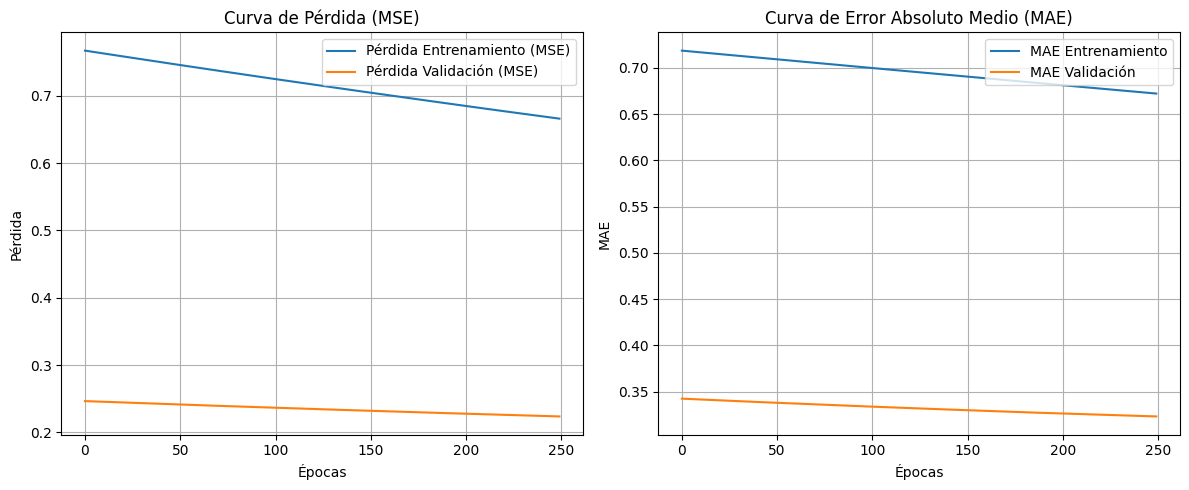

In [54]:

# 4. Generación de Gráficas de Métricas

plt.figure(figsize=(12, 5))

# --- CURVA DE PÉRDIDA (LOSS - MSE) ---
plt.subplot(1, 2, 1) 
plt.plot(history.history['loss'], label='Pérdida Entrenamiento (MSE)')
plt.plot(history.history['val_loss'], label='Pérdida Validación (MSE)')
plt.title('Curva de Pérdida (MSE)')
plt.ylabel('Pérdida')
plt.xlabel('Épocas')
plt.legend(loc='upper right')
plt.grid(True)

# --- CURVA DE MÉTRICA DE REGRESIÓN (MAE) ---
plt.subplot(1, 2, 2) 
plt.plot(history.history['mae'], label='MAE Entrenamiento')
plt.plot(history.history['val_mae'], label='MAE Validación')
plt.title('Curva de Error Absoluto Medio (MAE)')
plt.ylabel('MAE')
plt.xlabel('Épocas')
plt.legend(loc='upper right') 
plt.grid(True)

plt.tight_layout()
plt.show()